Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions import lotki_volterry_model, competition_model
from scipy.integrate import solve_ivp


Calculation of stationary points

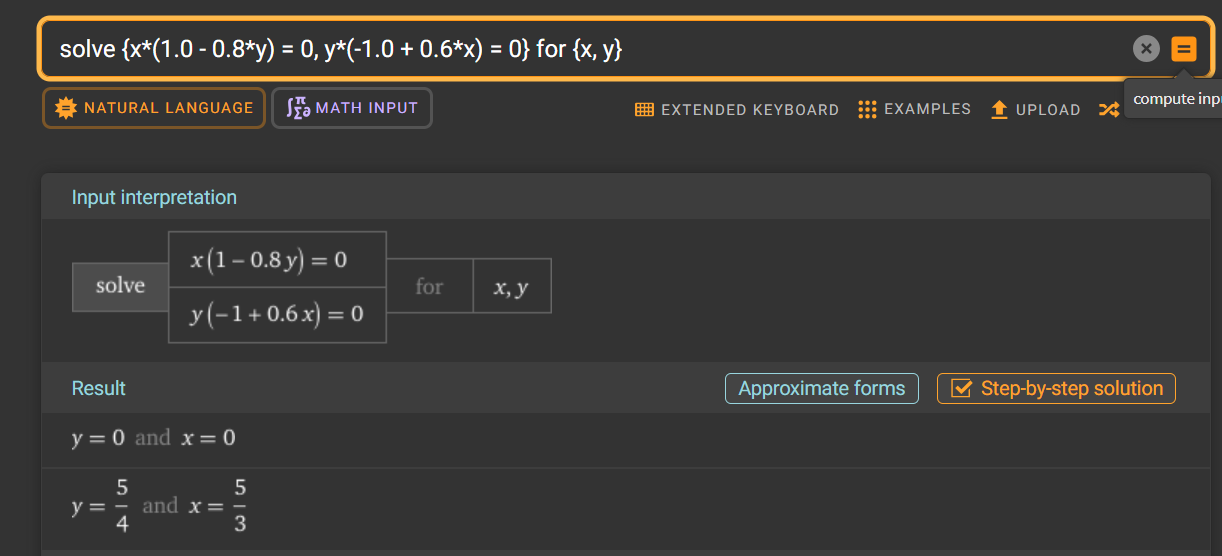

Parameters

In [2]:
alpha = 1.0
beta = 0.8
gamma = 1.0
delta = 0.6

Mutualism

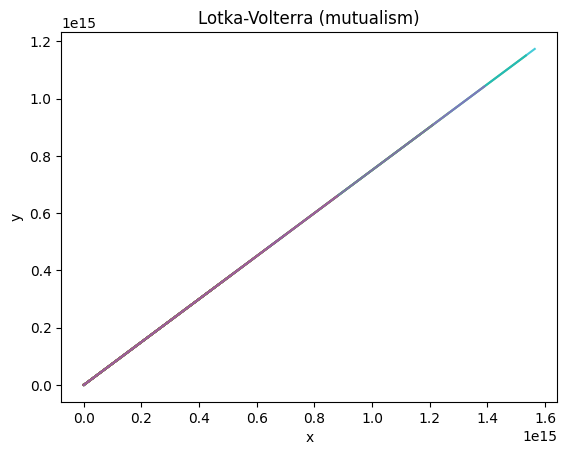

In [3]:
for x0 in np.linspace(0.1,2.0,5):
 for y0 in np.linspace(0.1,2.0,5):
    sol = solve_ivp(lotki_volterry_model,[0,50],[x0,y0], args=(alpha, beta, gamma, delta), max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.8)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Lotka-Volterra (mutualism)')
plt.show()

As can be seen in the graph, the number of organisms grows indefinitely.

Prey-predator

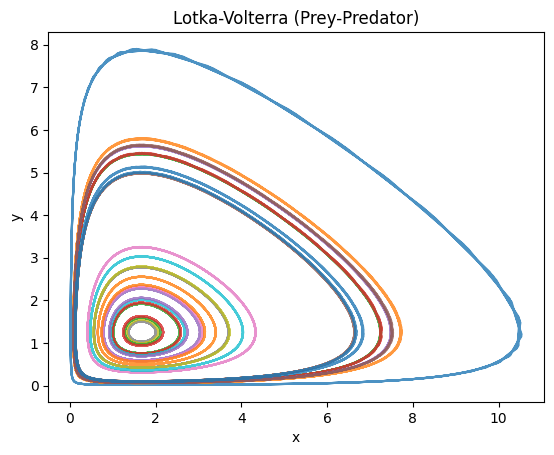

In [4]:
for x0 in np.linspace(0.1,2.0,5):
 for y0 in np.linspace(0.1,2.0,5):
    sol = solve_ivp(lotki_volterry_model,[0,50],[x0,y0], args=(alpha, -beta, -gamma, delta), max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra (Prey-Predator)')
plt.show()


The number of predators and prey fluctuates around the stationary points calculated above (x = 5/3, y = 5/4).

For competition we need to implement ["Competitive Lotka–Volterra equations"](https://en.wikipedia.org/wiki/Competitive_Lotka%E2%80%93Volterra_equations). This will also allow the representation of marginal, stable, and non-coexistence. 

Stable coexistence - competion

In [5]:
r1 = 1.0
r2 = 1.0
K1 = 100
K2 = 80
alpha12 = 0.5
alpha21 = 0.5

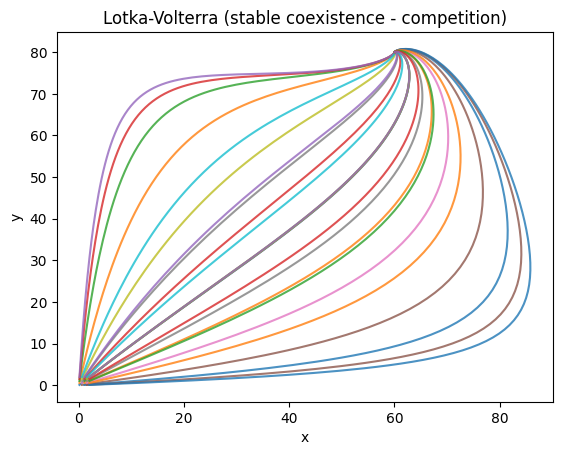

In [6]:
for x0 in np.linspace(0.1,2.0,5):
 for y0 in np.linspace(0.1,2.0,5):
    sol = solve_ivp(competition_model,[0,50],[x0,y0], args=(r1, r2, K1, K2, alpha12, alpha21), max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra (stable coexistence - competition)')
plt.show()


Marginal coexistence - competion

In [7]:
r1 = 1.0
r2 = 1.0
K1 = 100
K2 = 100
alpha12 = 1.5
alpha21 = 1.5

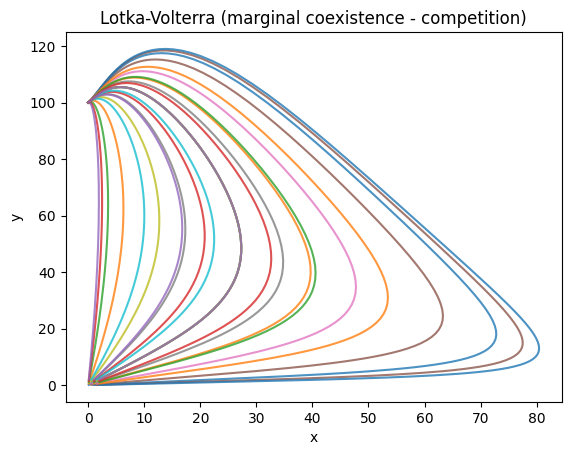

In [8]:
for x0 in np.linspace(0.1,2.0,5):
 for y0 in np.linspace(0.1,2.0,5):
    sol = solve_ivp(competition_model,[0,50],[x0,y0], args=(r1, r2, K1, K2, alpha12, alpha21), max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra (marginal coexistence - competition)')
plt.show()


Non-coexistence - competition

In [9]:
r1 = 1.0
r2 = 1.0
K1 = 100
K2 = 80
alpha12 = 0.5
alpha21 = 1.5

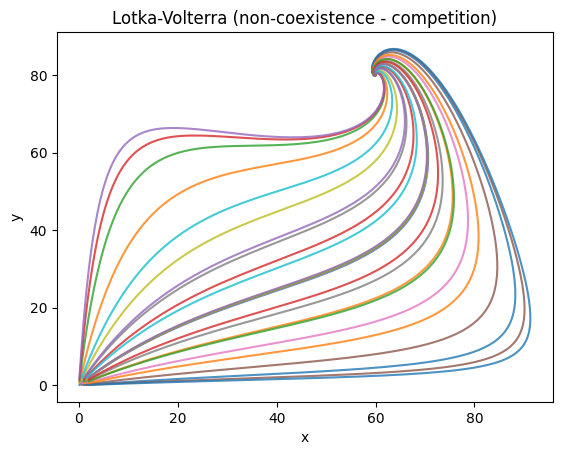

In [10]:
for x0 in np.linspace(0.1,2.0,5):
 for y0 in np.linspace(0.1,2.0,5):
    sol = solve_ivp(competition_model,[0,50],[x0,y0], args=(r1, r2, K1, K2, alpha12, alpha21), max_step=0.1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra (non-coexistence - competition)')
plt.show()

Control questions:
### 1. How to interpret the sign of the real part of the Jacobian eigenvalue in the context of stationary point stability?

> A negative sign of the real part of the eigenvalue means that the stationary point is stable (the system returns to it), while a positive sign means that the point is unstable (the system moves away from it).

### 2. Why can mutual competition lead to the extinction of oneof the populations?

> This is due to the principle of competitive exclusion: if one species is significantly more efficient at obtaining the same limited resources, it reduces their availability to a level that is insufficient forthe survival of the other, “weaker” species.